In [2]:
import numpy as np                                                                                                                                                                                                                          
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV


from sklearn import metrics

In [3]:
!pip install -U imbalanced-learn --break-system-packages


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.3 MB/s eta 0:00:00 MB/s eta 0:00:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.2
    Uninstalling imbalanced-learn-0.12.2:
      Successfully uninstalled imbalanced-learn-0.12.2


In [6]:
# Load The Things
df = pd.read_csv('../ext_sample.tsv', sep='\t')

df = df.replace({None: False, 'no': False, 'yes': True, 'false': False, 'true': True})
print(df['v'].value_counts())
df = df[df['hasgroundtruth'] == True]
df = df[df['text'].isna() == False]
df['explicitcoding'].value_counts()


Valid      2228
Test       1825
Explore     300
Name: v, dtype: int64


False    481
True     119
Name: explicitcoding, dtype: int64

In [8]:

df['v'].value_counts()

Valid      294
Test       291
Explore     15
Name: v, dtype: int64

In [9]:


train = df[df['v'].isin(['Explore', 'Valid'])]
test = df[df['v'].isin(['Test'])]



In [10]:
test['explicitcoding'].value_counts()

False    230
True      61
Name: explicitcoding, dtype: int64

In [11]:


X = train['text']
y = train['explicitcoding']
Xtest = test['text']
ytest = test['explicitcoding']

allX = df['text']
allY = df['explicitcoding']



In [12]:
len(test[test['explicitcoding'] == True])

61

In [13]:
f2 = open('data/Vocabulary/BigramMatchedTokens.txt', 'r')

v = f2.readlines()# +f1.readlines()
v = list({d:None for d in v}.keys())
v = [s.replace('\n','').replace('_', ' ') for s in v]
#.

In [14]:

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

In [15]:
len(v)

307

In [16]:
contains_boolean = True in X or False in X
print(contains_boolean)  # True
X = X.astype(str)

False


In [17]:

tf_vect = TfidfVectorizer(vocabulary=v, ngram_range=(1,2), binary = True)
tf_vect.fit(X, y)

# transform the training and validation data using count vectorizer object
XT = tf_vect.transform(X)
sm = SMOTE(random_state=420)
XT, YT = sm.fit_resample(XT, y)
#XT, YT = XT, y

In [18]:

#sgdc_gs = SGDClassifier(alpha=0.0001, average=False, fit_intercept=False, l1_ratio=0.05, loss='modified_huber', penalty='l1', random_state=420420)
#sgdc_gs.fit(XT,YT)


sgdc_params = {
    #'loss':['log_loss','hinge', 'modified_huber'],
       'loss':['log_loss', 'hinge', 'modified_huber'],

    'penalty':['l2', 'l1', 'elasticnet'],
    'n_iter_no_change':[5],
    'alpha':np.logspace( -2, -1, 1, 2, 9),
    'l1_ratio':[0.05,0.06,0.07,0.08,0.09,0.1,0.12,0.13,0.14,0.15,0.2],
  'average': [True, False],
    'fit_intercept':[ True]
}

sgdc = SGDClassifier(random_state=420420420)
sgdc_gs = GridSearchCV(sgdc, sgdc_params, cv=5, verbose=1, n_jobs=3)
sgdc_gs.fit(XT,YT)


Fitting 5 folds for each of 198 candidates, totalling 990 fits


GridSearchCV(cv=5, estimator=SGDClassifier(random_state=420420420), n_jobs=3,
             param_grid={'alpha': array([0.01234568]), 'average': [True, False],
                         'fit_intercept': [True],
                         'l1_ratio': [0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.12,
                                      0.13, 0.14, 0.15, 0.2],
                         'loss': ['log_loss', 'hinge', 'modified_huber'],
                         'n_iter_no_change': [5],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             verbose=1)

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

train_pred = sgdc_gs.predict(XT)
print(metrics.classification_report(YT,train_pred))


#print(roc_auc_score(YT, sgdc_gs.predict_proba(XT)[:, 1]))

#cm =confusion_matrix(YT, train_pred)
#a =ConfusionMatrixDisplay(confusion_matrix=cm)
#a.plot()

              precision    recall  f1-score   support

       False       0.93      0.96      0.94       251
        True       0.96      0.92      0.94       251

    accuracy                           0.94       502
   macro avg       0.94      0.94      0.94       502
weighted avg       0.94      0.94      0.94       502



In [20]:

Xtest = Xtest.astype(str)
Xtestt =  tf_vect.transform(Xtest)
test_pred = sgdc_gs.predict(Xtestt)

print(metrics.classification_report(ytest,test_pred))

#cm =confusion_matrix(ytest, test_pred)
#a =ConfusionMatrixDisplay(confusion_matrix=cm)
#a.plot()

ytest

              precision    recall  f1-score   support

       False       0.98      0.96      0.97       230
        True       0.86      0.92      0.89        61

    accuracy                           0.95       291
   macro avg       0.92      0.94      0.93       291
weighted avg       0.95      0.95      0.95       291



311     False
322     False
347     False
358     False
400     False
        ...  
4308    False
4312    False
4328    False
4340    False
4350    False
Name: explicitcoding, Length: 291, dtype: bool

0.9728439059158944


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


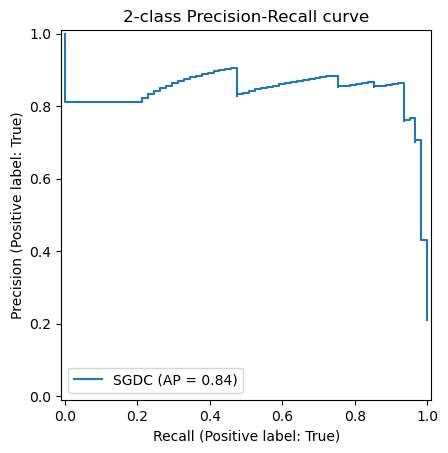

<Figure size 640x480 with 0 Axes>

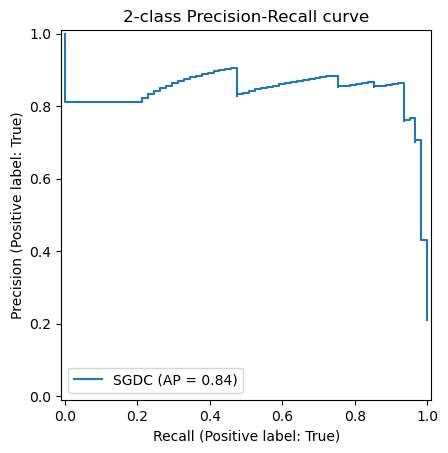

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


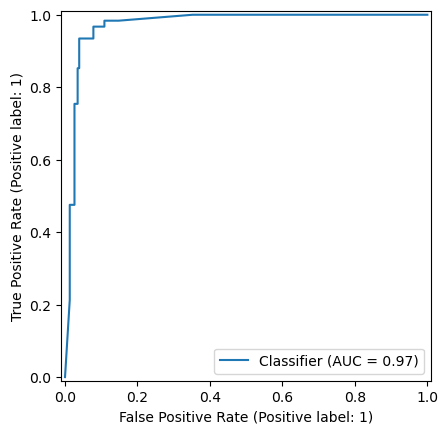

<Figure size 640x480 with 0 Axes>

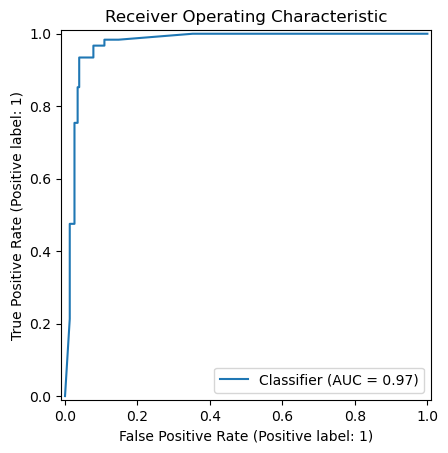

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
print(roc_auc_score(ytest, sgdc_gs.predict_proba(Xtestt)[:, 1]))

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
display = PrecisionRecallDisplay.from_estimator(
    sgdc_gs, Xtestt, ytest, name="SGDC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

plt.figure()
display.plot()


# Save te plot as an EPS file
plt.title('2-class Precision-Recall curve')
plt.savefig('pr_curve.eps', format='eps')
plt.show()

from sklearn import metrics

roc_display = RocCurveDisplay.from_predictions( ytest, sgdc_gs.predict_proba(Xtestt)[:, 1])

# Create a new figure
plt.figure()
roc_display.plot()
plt.title('Receiver Operating Characteristic')


# Save the plot as an EPS file
plt.savefig('roc_curve.eps', format='eps')
plt.show()

In [22]:
from sklearn.metrics import precision_recall_curve
p, r, t = precision_recall_curve(ytest, sgdc_gs.predict_proba(Xtestt)[:, 1])
t
Xtestt

<291x307 sparse matrix of type '<class 'numpy.float64'>'
	with 961 stored elements in Compressed Sparse Row format>

In [23]:
tdf = pd.read_csv('../2eval/combined.tsv',sep='\t')
adf = pd.read_csv('../ext_sample.tsv', sep='\t')
adf['doi'] = adf['k']

adf
tdf = pd.merge(tdf, adf, how='left', on = 'doi')
tdf2=tdf

tdf['a3'].value_counts()
#print(len(tdf))
#tdf = tdf[tdf['a1'] == tdf['a2']]

tdf = tdf.replace({None: False, 'no': False, 'yes': True})
tdf2 = tdf2.replace({None: False, 'no': False, 'yes': True})

print(tdf['a2'].value_counts())

False    340
True      80
Name: a2, dtype: int64


In [24]:
tdf['group'].value_counts()

0    70
1    70
2    70
3    70
4    70
5    70
Name: group, dtype: int64

In [25]:
from sklearn.metrics import cohen_kappa_score 
for i in range(6):
    print('')
    print('Group: ' + str(i))
    
    ttdf = tdf[tdf['group'] == i]
    ttdf['text'] = ttdf['text'].astype(str)
    FTest =  tf_vect.transform(ttdf['text'])
    test_pred = sgdc_gs.predict(FTest)
    
    print('a1/a2: ' + str(cohen_kappa_score(ttdf['a1'], ttdf['a2'])))
    
    print('a1/alg: ' + str(cohen_kappa_score(ttdf['a1'], test_pred)))
    
    print('a2/alg: ' + str(cohen_kappa_score(ttdf['a2'], test_pred)))


Group: 0
a1/a2: 0.8325358851674641
a1/alg: 0.8113207547169812
a2/alg: 0.7422680412371134

Group: 1


/tmp/ipykernel_3416/2544093234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttdf['text'] = ttdf['text'].astype(str)
/tmp/ipykernel_3416/2544093234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttdf['text'] = ttdf['text'].astype(str)


a1/a2: 0.49612403100775193
a1/alg: 0.5112781954887218
a2/alg: 0.9056603773584906

Group: 2
a1/a2: 0.9337748344370861
a1/alg: 0.8644724104549855
a2/alg: 0.7902097902097902

Group: 3


/tmp/ipykernel_3416/2544093234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttdf['text'] = ttdf['text'].astype(str)
/tmp/ipykernel_3416/2544093234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttdf['text'] = ttdf['text'].astype(str)


a1/a2: 0.8923076923076924
a1/alg: 0.8320000000000001
a2/alg: 0.8439821693907875

Group: 4
a1/a2: 0.8698884758364313
a1/alg: 0.8018120045300113
a2/alg: 0.7466827503015682

Group: 5


/tmp/ipykernel_3416/2544093234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttdf['text'] = ttdf['text'].astype(str)
/tmp/ipykernel_3416/2544093234.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttdf['text'] = ttdf['text'].astype(str)


a1/a2: 0.722662440570523
a1/alg: 0.6067415730337078
a2/alg: 0.8698884758364313


In [26]:
for i in range(6):
    print('')
    print('Group: ' + str(i))
    
    ttdf = tdf[tdf['group'] == i]
    ttdf['text'] = ttdf['text'].astype(str)
    FTest =  tf_vect.transform(ttdf['text'])
    test_pred = sgdc_gs.predict(FTest)
    
    print('a1/gt: ' + str(cohen_kappa_score(ttdf['a1'], ttdf['explicitcoding'])))
    
    print('a2/gt: ' + str(cohen_kappa_score(ttdf['a2'], ttdf['explicitcoding'])))
    
    print('alg/gt: ' + str(cohen_kappa_score(test_pred, ttdf['explicitcoding'])))


Group: 0
a1/gt: 0.9479940564635958
a2/gt: 0.8835274542429284
alg/gt: 0.854368932038835

Group: 1


/tmp/ipykernel_3416/617573765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttdf['text'] = ttdf['text'].astype(str)
/tmp/ipykernel_3416/617573765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttdf['text'] = ttdf['text'].astype(str)


a1/gt: 0.5419847328244276
a2/gt: 0.9513212795549374
alg/gt: 0.9541284403669725

Group: 2
a1/gt: 1.0
a2/gt: 0.9337748344370861
alg/gt: 0.8644724104549855

Group: 3


/tmp/ipykernel_3416/617573765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttdf['text'] = ttdf['text'].astype(str)
/tmp/ipykernel_3416/617573765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttdf['text'] = ttdf['text'].astype(str)


a1/gt: 0.8923076923076924
a2/gt: 1.0
alg/gt: 0.8439821693907875

Group: 4
a1/gt: 0.9585798816568047
a2/gt: 0.910828025477707
alg/gt: 0.838150289017341

Group: 5


/tmp/ipykernel_3416/617573765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttdf['text'] = ttdf['text'].astype(str)
/tmp/ipykernel_3416/617573765.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttdf['text'] = ttdf['text'].astype(str)


a1/gt: 0.722662440570523
a2/gt: 1.0
alg/gt: 0.8698884758364313


In [27]:
from sklearn.metrics import cohen_kappa_score



tdf['text'] = tdf['text'].astype(str)
FTest =  tf_vect.transform(tdf['text'])
test_pred = sgdc_gs.predict(FTest)

from scipy import stats
ac, ap = stats.pointbiserialr(test_pred, tdf2['explicitcoding'])
print(ac)
print(ap)

ac, ap = stats.pointbiserialr(tdf2['a1'], tdf2['explicitcoding'])
print(ac)
print(ap)


ac, ap = stats.pointbiserialr(tdf2['a2'], tdf2['explicitcoding'])
print(ac)
print(ap)

print('')


print(cohen_kappa_score(test_pred, tdf2['a2']))

print(cohen_kappa_score(test_pred, tdf2['explicitcoding']))
print(cohen_kappa_score(tdf2['a1'], tdf2['explicitcoding']))
print(cohen_kappa_score(tdf2['a2'], tdf2['explicitcoding']))

#print(np.corrcoef(tdf['a1'], tdf['a2'])[0,1])
#print(metrics.classification_report(tdf2['a1'],tdf2['a2']))

#print(roc_auc_score(tdf['a1'], sgdc_gs.predict_proba(FTest)[:, 1]))
#cm =confusion_matrix(tdf['a1'], test_pred)
#a =ConfusionMatrixDisplay(confusion_matrix=cm)
#a.plot()

0.8720579860257919
8.525305550383797e-132
0.8498892006291905
2.316770816098645e-118
0.9490039616723229
1.147320371797668e-211

0.8166259168704156
0.8717034925160371
0.8496932515337423
0.9477054429028815


In [58]:
# Load The Things
dfa = pd.read_csv('../ext_sample.tsv', sep='\t')

print(dfa['hasgroundtruth'].value_counts())
dfa = dfa[dfa['hasgroundtruth'] == False]

print(dfa['text'].isna().value_counts())

dfa = dfa[dfa['text'].isna() == False]
dfa = dfa.replace({None: False, 'no': False, 'yes': True})
dfd = dfa



False    3753
True      600
Name: hasgroundtruth, dtype: int64
False    3689
True       64
Name: text, dtype: int64


In [30]:
dfa = dfa['text']
print(dfa.shape)
dfax =  tf_vect.transform(dfa)
p = sgdc_gs.predict(dfax)

np.unique(p, return_counts=True)

(3689,)


(array([False,  True]), array([2780,  909]))

In [31]:
p

array([False, False,  True, ..., False, False, False])

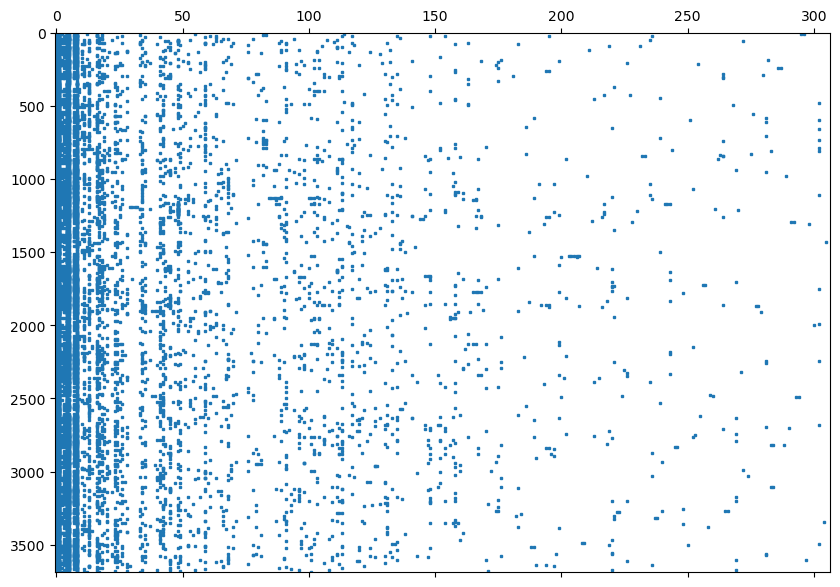

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [10, 7]
z = plt.spy(dfax,precision=0.05,markersize=2,aspect='auto', animated=True,antialiased=True,snap=True)


In [36]:
!pip install habanero --break-system-packages

Defaulting to user installation because normal site-packages is not writeable


In [49]:
len(dfd)

3689

In [42]:


from habanero import Crossref
import pprint
def fetch_crossref_info(dois):
    cr = Crossref()
    extended_info = []

    for i in range(0, len(dois), 100):
        batch = dois[i:i + 100]
        try:
        # Fetch data for a batch of DOI
            results = cr.works(ids=batch)
            for item in results:
                item = item['message']
                info = {
                    'doi': item.get('DOI'),
                    'title': item.get('title', [''])[0],
                    'publication_year': item.get('created', {}).get('date-parts', [[None]])[0][0],
                    'journal': item.get('container-title', [''])[0],
                    'citation_count': item.get('is-referenced-by-count', 'NA')
                }
                extended_info.append(info)
            print('got batch ' + str(i))
        except Exception as e:
            print(f"Error fetching data for batch starting with DOI {batch[0]}: {e}")
    return extended_info
# Fetch and extend data

doi_list = dfd['k'].tolist()
extended_info = pd.DataFrame(fetch_crossref_info(doi_list))


got batch 0
got batch 100
got batch 200
got batch 300
got batch 400
got batch 500
got batch 600
got batch 700
got batch 800
got batch 900
got batch 1000
got batch 1100
got batch 1200
got batch 1300
got batch 1400
got batch 1500
got batch 1600
got batch 1700
got batch 1800
got batch 1900
got batch 2000
got batch 2100
got batch 2200
got batch 2300
got batch 2400
got batch 2500
got batch 2600
got batch 2700
got batch 2800
got batch 2900
got batch 3000
got batch 3100
got batch 3200
got batch 3300
got batch 3400
got batch 3500
got batch 3600


In [43]:

dfd['doi'] = dfd['k']
df_extended = pd.merge(dfd, extended_info, on='doi', how='left')

In [44]:
df_extended['Predict'] = p

In [45]:

df_extended.to_csv('extended_df.tsv', sep='\t', index=False)